<a href="https://colab.research.google.com/github/KONA1005/google_drive/blob/main/google_colab/Chapter_6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA
- 차원 축소의 개념
- PCA 개념

- 과일 사진의 경우, 10,000개의 픽셀(높*너비)
  + 10,000개의 특성이 있는 셈( 차원 )
- 정형데이터에서도 활용 가능
  + 문자열 데이터, 수치형 데이터(연속형 데이터, 비연속형 데이터)

**차원축소** 란 일부 특성을 선택하여 데이터 크기를 줄임
- 머신러닝 측면 : 성능 향상 위해 & 과대적합 발생 방지

- 양적 데이터사이의 분산 - 공분산 관계를 이용해서 선형결합으로 표시가 되는 주성분을 찾음
- 2~3개의 주성분으로 전체 변동을 찾는 것이 PCA

- 326p
- 그래프를 보면 처음 10개의 주성분이(10,000개의 픽셀이 압축됨)

알고리즘 구성할 때 필요한 데이터 픽셀 수 ,
- 원래는 300 x 10,000개 픽셀 필요
- 300 x PC 10주 성분으로 줄임
- 기존 1시간 걸림 / 10분 걸림
- 그럼에도 불구하고 분류가 더 잘 되더라~


# PCA 클래스

데이터 불러오기

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-03-31 06:16:08--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-03-31 06:16:08--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-03-31 06:16:08--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

- 배열로 업로드

In [3]:
import numpy as np
fruits = np.load("fruits_300.npy") # 3차원인데 2차원배열로 ㄴ한다
fruits_2d = fruits.reshape(-1, 100* 100)
fruits_2d.shape

(300, 10000)

- seklarn.decomposition 모델

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50) 

# PCA 50개 성분으로 300 * 10000 픽셀값을 압축
pca.fit(fruits_2d)


PCA(n_components=50)

In [5]:
print(pca.components_.shape)

(50, 10000)


- 그래프 그리기

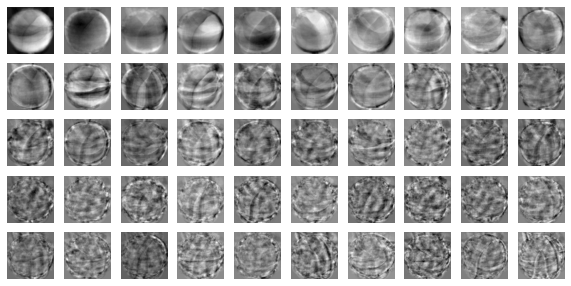

In [7]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

# 주 성분으로 그래프
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [8]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


- 데이터의 원래 크기 대비해서 1/200 줄인것
- 용량이 줄었다는것 과 같다.


# 원상복구. = 원본 데이터 재구성
- 10,000개의 특성을 50개로 줄임
- 100% 재구성은 어렵지만 그래도 쓸만 하다


In [9]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse)

[[1.06889781 1.05486045 1.07304612 ... 1.         1.         1.        ]
 [1.02203899 0.99970463 1.03341031 ... 1.         1.         1.        ]
 [1.06430108 1.058871   1.07411027 ... 1.         1.         1.        ]
 ...
 [0.99132085 0.92472666 0.9689502  ... 1.         1.         1.        ]
 [0.56391969 0.95180005 0.72868379 ... 1.         1.         1.        ]
 [1.02242195 0.94447658 0.96598681 ... 1.         1.         1.        ]]


In [11]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100,100)
print(fruits_reconstruct.shape)

(300, 100, 100)


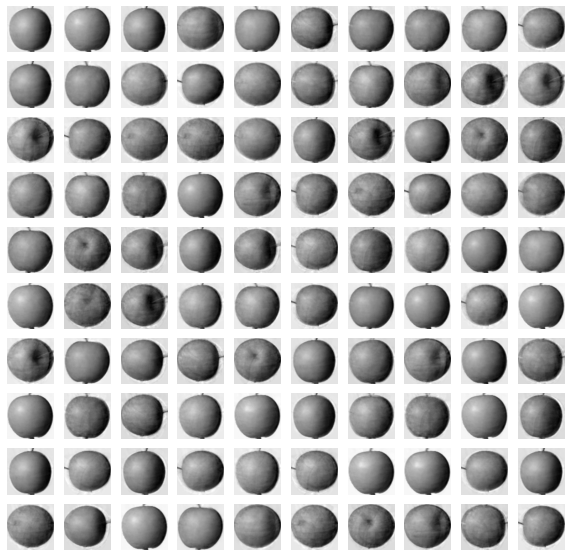

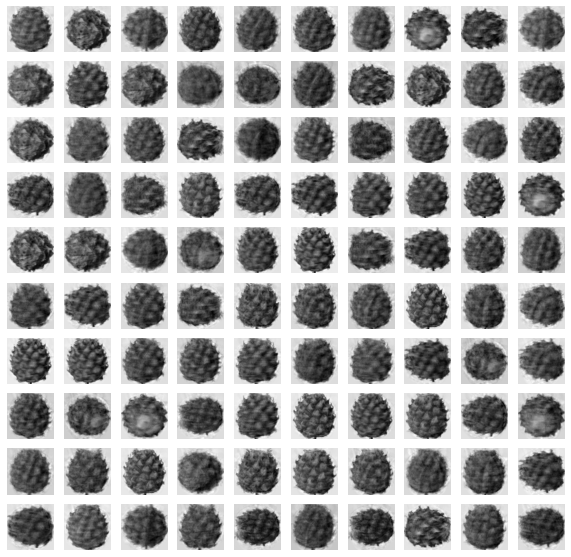

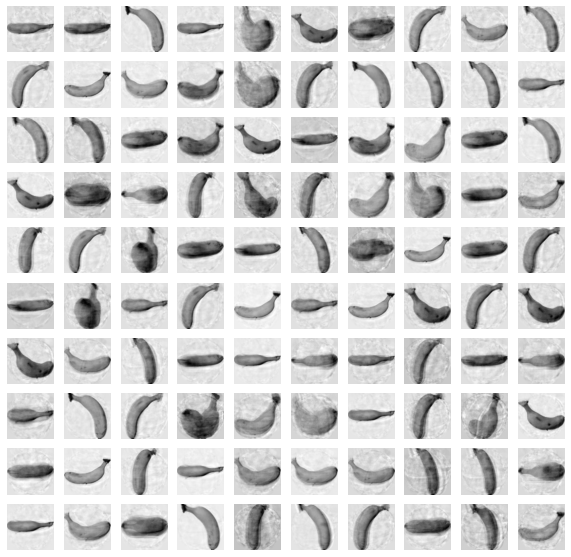

In [12]:
for start in[ 0, 100 , 200]:
  draw_fruits(fruits_reconstruct[start:start + 100])
  print("\n")

# 설명된 분산

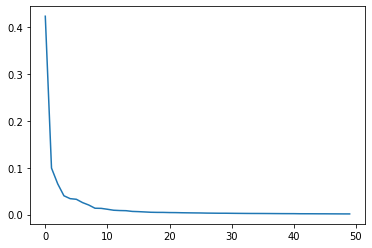

In [14]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

- 처음 10개의 주성분이 대부분의 분산을 표현한다.
- 즉 11개의 주성분부터 50개 까지는 잘 설명이 안됨

In [15]:
print(np.sum(pca.explained_variance_ratio_))

0.921495166344079


# 다른 알고리즘과 함께 사용하기
- 3개의 과일 사진 분류 위해 로지스틱 회귀


In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# 타깃값 생성
target = np.array([0] * 100 + [1] * 100 + [2] * 100 ) # 0 백개 1백개 2 백개 
print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


- 교차검증 진행
- PCA 수행 전. RAW data

In [17]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.444181489944458


- PCA 수행 후 학습 시간 비교

In [18]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.0495182991027832


** 모형학습의 시간이 엄청 빨라졌다**

- 주 성분의 매개변수 개수 지정 , 분산 비율 지정

In [20]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

print(pca.n_components_)

2


- 주성분을 2개로 압축 시킴

In [22]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [23]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03739023208618164


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


- 차원 축소를 데이터를 k-평균 알고리즘에 추가한다

In [25]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state= 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


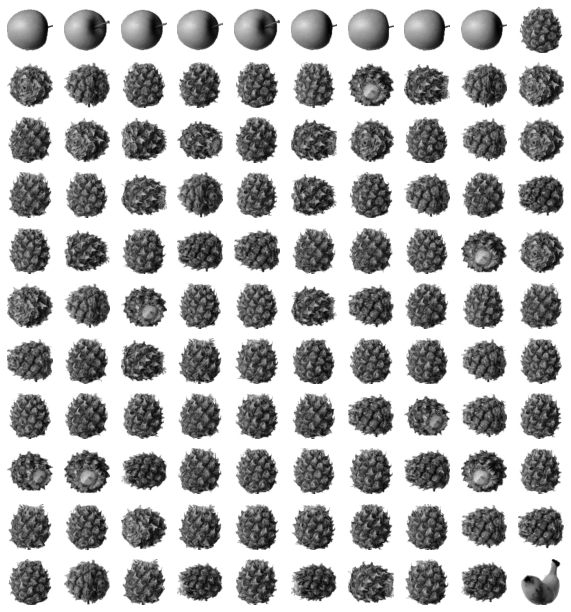

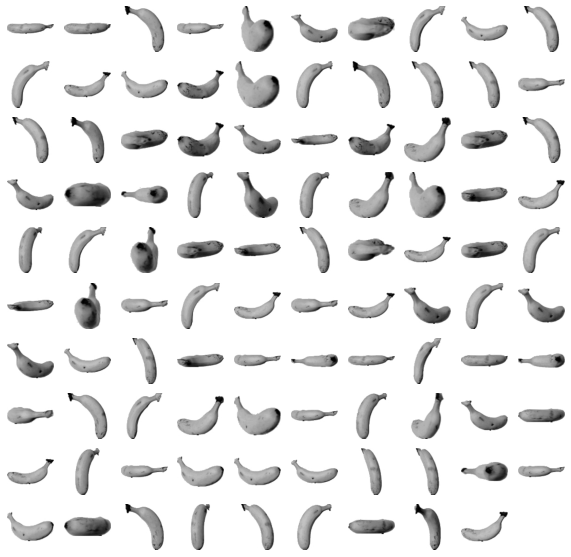

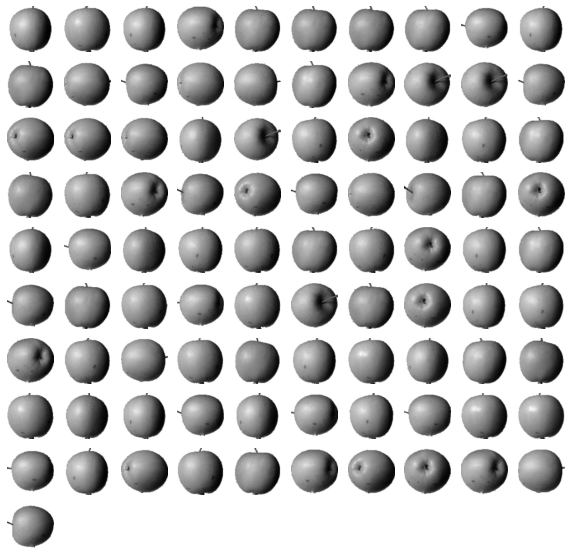

In [27]:
for label in range(0, 3):
  draw_fruits(fruits[km.labels_ == label])
  print("\n")

- 시각화로 뿌려주기

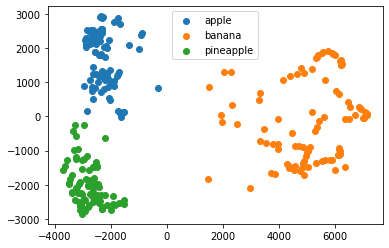

In [29]:
for label in range(0, 3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()